In [1]:
%matplotlib inline
%matplotlib nbagg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import bokeh

import ipywidgets
import bqplot
import pandas as pd
import us
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt



# from bqplot import pyplot as plt 
import bqplot
import us

from __future__ import print_function
import numpy as np

from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import pandas as pd
#import matplotlib.pyplot as plt
# from bqplot import pyplot as plt 

from __future__ import print_function
import numpy as np

from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
import pandas as pd
#import matplotlib.pyplot as plt
# from bqplot import pyplot as plt 

from __future__ import print_function
import numpy as np

from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip
)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
#reads into the location.txt file, provides headers
locations=pd.read_table("C:/Users/Sayali/Desktop/Sem_1/Data_Visualisation/location.txt",names=["longitude","latitude","default1","default2"],sep="\t")

#drop the irrelevant columns default1, defulat 2
locations.drop(["default1","default2"],inplace=True,axis=1)

In [3]:
# set a new column in location with 438 values
locations["station"]=np.arange(0,438)


In [4]:
#Set the index to 'station'
locations.set_index("station", inplace=True)

In [5]:
#  Here we will calculate the location of Tohoku earthquake

In [6]:
tohoku_location=(-142.4,38.3)

In [7]:
#calculate the distance from tohoku location to each station
from haversine import haversine
locations["distance"]=[haversine(locations.loc[i],tohoku_location) for i in locations.index]

In [8]:
#sort the location by the distances from the center point
locations=locations.sort_values("distance")

In [9]:
# Tohoku Earthquake time and magnitude data

In [10]:
#read into the time & magnitude file
array_vals= pd.read_csv("C:/Users/Sayali/Desktop/Sem_1/Data_Visualisation/data_tohoku_norm_transpose.csv", header=None)

In [11]:
# We decided to create a range, for selecting time for 4 hours the frequency is of 1 second each.
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)

# array_vals = array_vals[7000:]

In [12]:
# Normalization
#normalize magnitude in range [0.1] 
min_val=array_vals.min().min()
max_val=array_vals.max().max()
norm_array_vals=(array_vals-min_val)/(max_val-min_val)

In [13]:
#adds in the location data 
norm_array_vals=norm_array_vals[locations.index]

In [14]:
array_vals.columns=np.arange(0,438)


In [15]:
norm_array_vals.fillna(0, inplace=True)

In [16]:
# # Replacing the Nan values with the average values
# #norm_array_vals.fillna(0, inplace=True)
# avg=norm_array_vals.mean()
# norm_array_vals= norm_array_vals.fillna((avg[49]+avg[50] )/2)

In [17]:
norm_array_vals.fillna(0, inplace=True)

In [18]:
# # Plotting the spectogram


def make_spect():
    fig, ax = plt.subplots()
    plt.imshow(array_vals.transpose(), aspect = 'auto', cmap = 'viridis',vmin=0, vmax=1)
    plt.colorbar(label="Scale of the Magnitude of Tohoku Earthquake")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Detector')
    ann = ax.annotate("", xy=(0,0),xytext=(0,15),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"))
    ann.set_visible(False)

    def hover(event):
        if event.xdata<(ax.get_xlim()[1]-ax.get_xlim()[0])/2:
            ann.xy=(event.xdata+100,event.ydata)  
        else:
            ann.xy=(event.xdata-3000,event.ydata)
        ann.set_text("detector#=%s\ntime=%ss" %(locations.index.values[int(event.ydata)], int(event.xdata)))   
        ann.set_visible(True)

    cid = fig.canvas.mpl_connect('motion_notify_event', hover)
    
#     fig, ax = plt.subplots()
#     plt.imshow(array_vals.transpose(), aspect = 'auto', cmap = 'viridis',vmin=0, vmax=1)
#     plt.colorbar(label="Tohoku Earthquake Magnitude")
#     plt.xlabel('Time (Seconds)')
#     plt.ylabel('Detector')
#     ann = ax.annotate("", xy=(0,0),xytext=(0,15),textcoords="offset points",
#                         bbox=dict(boxstyle="round", fc="w"))
#     ann.set_visible(False)

#     def hover(event):
#         if event.xdata<(ax.get_xlim()[1]-ax.get_xlim()[0])/2:
#             ann.xy=(event.xdata+100,event.ydata)  
#         else:
#             ann.xy=(event.xdata-3000,event.ydata)
#         ann.set_text("detector#=%s\ntime=%ss" %(locations.index.values[int(event.ydata)], int(event.xdata)))   
#         ann.set_visible(True)

#     cid = fig.canvas.mpl_connect('motion_notify_event', hover)

In [19]:
# make_spect()
# cid

In [20]:
### Get the waveform for a station from the starting to 
### the selected interval 

def wave_form_detect(station, time):
    x = range(0, time)
    y = array_vals.iloc[:time][station]
    return x, y

### Update the wave whenever the time or the station is changed. 

def update_wave(self, target):
    #print(sel_station)
    new_x, new_y = wave_form_detect(scat_plot.selected, slider.value)
    wave.x = new_x
    wave.y = new_y

### Define the color in the linear scale of the stations based on the time. 

def get_col(time): 
    temp = np.array(norm_array_vals.iloc[time].values.flatten())
    c_map = np.log10(np.nan_to_num(temp))
    return c_map

## update the detector colors whenever the time is changed. 
   
def upd_col_lat(change): 
    scat_plot.color=get_col(slider.value)
    #rint(change.new)
    
def upd_wf_title(self, target):
    waveform.title = 'Waveform for station: ' + str(scat_plot.selected) + ' for the time period: ' + str(slider.value)
    
    
def upd_time_wf(change):
    waveform.title = 'Waveform for station: ' + str(scat_plot.selected) + ' for the time period: ' + str(slider.value)

In [21]:
# Creating a time slider for the 4 hours

time = pd.Series(range(0,array_vals[0].size))
#slider = interactive(get_time, interval=(time.min()+1, time.max()+1, 1))
slider =  widgets.IntSlider(min=time.min()+1, max=time.max()+1, value=1, description='Time Period for the plots')
display(slider)

IntSlider(value=1, description='Time Period for the plots', max=14401, min=1)

In [22]:
### Creating Maps using bqplot

### projecttion for the USA states map. 
sc_geo = bqplot.AlbersUSA()
sc_geo.scale_factor=1080


states_map = bqplot.Map(map_data=bqplot.topo_load('map_data/USStatesMap.json'), scales={'projection': sc_geo},hovered_styles={'hovered_fill':None})

## setting the hover highlight to false: 
states_map.hover_highlight=False

#Figure(marks=[states_map], title='US States Map Example')

In [23]:
# Figure(marks=[states_map], title='US States Map Example')

In [24]:
## Create the scatter plot of the stations. 
## use the loation of the stations to plot the values. 


## set the x-scale for the scatter plot 
sc_x = LinearScale(min=25, max=50)

## set the y-scale for the scatter plot 
sc_y = LinearScale(min=-115, max=-80)



col_sc = ColorScale()

color = get_col(slider.value)


## Creatinig the scatter plot with the lat and long values of the detectors: 
## Included the "select" interaction with the click event. 

scat_plot = Scatter(x=locations['latitude'] , y=locations['longitude'], 
                scales={'x': sc_x, 'y': sc_y, 'color': col_sc},                
                color=color,
                stroke='blue',
                interactions={'click': 'select'},
                selected_style={'opacity': 1.7, 'fill': 'yellow', 'stroke': 'blue'},
                unselected_style={'opacity': 1.3})

# Define the axes themselves

#axis_x = Axis(scale=sc_x, tick_format='0.1f')
#axis_y = Axis(scale=sc_y, tick_format='0.1f', orientation='vertical')

ax_c = ColorAxis(scale=col_sc, label='Intensity',side='left',tick_format='0.3f')
# The graph itself...
#detector_loc = Figure(marks=[states_map,scat_plot], axes=[axis_x, axis_y,ax_c], title='Detector Location')
detector_loc = Figure(marks=[states_map,scat_plot],axes=[ax_c], title='Detector Location')
# detector_loc

C:\Users\Sayali\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


In [25]:
###  SEt the scales for the waveform 

x = LinearScale()
y = LinearScale(min=-1.7, max=1.7)


### create a animation time variable so that the transformation is smooth. 

try:
    ani_time = int(slider.value/10)
except TypeError:
    ani_time = 500


### Create a line plot using the X and Y values. 

wave = Lines(scales={'x': x, 'y': y}, colors=['green'],
               enable_move=False)

ax_x = Axis(scale=x, tick_format='0.f', label = 'Time (seconds)')
ax_y = Axis(scale=y, tick_format='0.3f', label = 'Magnitude of wavwform', orientation='vertical')

waveform = Figure(marks=[wave], axes=[ax_x, ax_y], 
                title='Waveform:',
                animation_duration=ani_time)

# Calculate the waveform for the station for default values...
initial_station = np.random.randint(0,len(locations))
initial_timeinterval=1500

wave.x, wave.y = wave_form_detect(initial_station, initial_timeinterval)
waveform.title = 'Waveform for station: ' + str(initial_station) + ' for the time period: ' + str(initial_timeinterval)
# waveform

In [26]:
### Function calls for the callbacks. 

## The below function updates the wave on 
## selection of the detector. 
scat_plot.on_element_click(update_wave)

## For updating the title with time and station 
scat_plot.on_element_click(upd_wf_title)

## For updating the color of the station based on slider valus 
slider.observe(upd_col_lat, names='value')

## For updating the title of the wavefor  based on slider valus 
slider.observe(upd_time_wf, names='value')

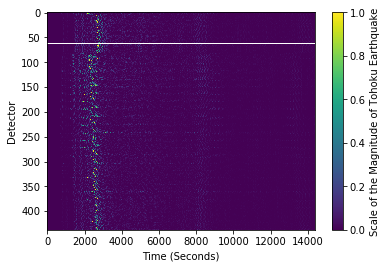

In [27]:
make_spect()

In [28]:
# Creating a time slider for the 4 hours

time = pd.Series(range(0,array_vals[0].size))
#slider = interactive(get_time, interval=(time.min()+1, time.max()+1, 1))
slider =  widgets.IntSlider(min=time.min()+1, max=time.max()+1, value=1, description='Time Period')
display(slider)

IntSlider(value=1, description='Time Period', max=14401, min=1)

IntSlider(value=1, description='Time Period', max=14401, min=1)

HBox(children=(Figure(axes=[Axis(label='Time (seconds)', scale=LinearScale(), tick_format='0.f'), Axis(label='Magnitude of wavwform', orientation='vertical', scale=LinearScale(max=1.7, min=-1.7), tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['green'], interactions={'hover': 'tooltip'}, scales={'x': LinearScale(), 'y': LinearScale(max=1.7, min=-1.7)}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}}, tooltip_style={'opacity': 0.9}, x=array([   0,    1,    2, ..., 1497, 1498, 1499]), y=array([-0.00039977,  0.00015086,  0.00068508, ..., -0.043143  ,
       -0.058778  , -0.073008  ]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Waveform for station: 304 for the time period: 1500'), Figure(axes=[ColorAxis(label='Intensity', scale=ColorScale(), side='left', tick_format='0.3f')], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Map(hover_highlight=False, hovered_styles={'hovered_fill': None}, interactions={'hover': 'tooltip'}, map_data={'type': 'Topology', 'objects': {'land': {'type': 'MultiPolygon', 'properties': {'counties': None}, 'arcs': [[[5830, 6026, 6034, 6073, 6164, 6179, 6023, 6043, 6231, 6416, 6410, 6564, 6243, 6565, 6546, 6475, 6542, 6784, 6741, 6811, 6739, 6870, 6965, 7087, 7246, -7086, 7247, 7255, 7256, 7257, 7305, 7566, 9399, 7668, 9397, -7836, 9398, 7838, 8050, 8017, 8018, 8019, 8020, 8021, 8047, 8023, 8252, 8247, 8302, 8493, 8575, -8491, 8576, 8671, 8807, 8877, 8984, 9074, 9116, 9138, 9129, 9073, 8960, 8874, 8961, 8956, 8957, 9090, 9130, 9181, -9123, 9182, 9125, 9177, 9255, 9278, 9279, 9280, 9311, 9306, 9307, 9308, 9309, 9318, 9340, 9347, 9342, 9343, 9344, 9345, 9349, 9338, 9326, 9317, 9284, 9315, 9286, 9266, 9241, 9239, 9214, 9200, 9170, 9113, 9114, 9350, 8936, 8837, 8937, 9039, 8977, 9038, 8979, 8884, 8980, 8886, 8777, -8768, 8778, 8770, 8761, 8755, 8642, 8643, 8644, 8667, 8810, 8833, 8851, 8819, 8981, 9002, 8999, 9000, 9064, 8974, 9059, -8971, 9053, 9054, 9055, 9056, 9057, 9083, 9044, 9023, 9011, 9034, 8988, 9065, 9108, 9067, 8991, 9107, 9109, 9152, 9193, 9141, 9196, 9143, 9144, 9145, 9156, 9195, 9206, 9226, 9190, 9227, 9208, 9222, 9232, 9225, 9233, 9234, 9235, 9252, 9273, 9303, 9334, 9339, 9331, 9328, 9292, 9231, 9167, 9104, 8944, 8844, 8841, 8854, 8358, 8360, 7864, 8080, 8008, 8177, 8470, 8160, 7700, 7715, 7672, 7495, 7030, 6995, 6876, 6510, 5861, 5585, 5267, 5171, 5264, 5415, 5133, 4992, 4822, 4518, 4663, 4437, 4662, 4439, 4447, 4816, 4449, 3587, 2648, 2337, 1859, 1579, 1433, 1268, 954, 753, 600, 639, 586, 588, 454, 330, 221, 175, 222, 306, 264, 358, 261, 359, 308, 394, 357, 294, 184, 172, 185, 126, 2, 73, 83, 78, 81, 22, 34, 18, 41, 97, 86, 44, 48, 27, 8, 51, 108, 91, 96, 101, 38, 30, 62, 66, 55, 58, 104, 9351, 123, 139, 192, 9352, 191, 134, 9354, 9356, 9357, 541, 465, 421, 9362, 433, 9366, 9368, 472, 9377, 9374, 9375, 9379, 554, 9369, 690, 9370, 854, 855, 856, 1128, 1140, 9371, 1138, 1259, 1443, 1591, 1767, 1926, 1992, 2081, 2199, 2497, 2499, 2431, 2170, 2116, 1954, 1753, 1654, 1502, 1348, 1197, 1085, 9386, 9387, 922, 9382, 9381, 748, 797, 9388, 1048, 1208, 9389, 1403, 1529, 9390, 1546, 9391, 1893, 9392, 9396, 2469, 2470, 2471, 2472, 2473, 2478, 2479, 2480, 2632, 2558, 2599, 2544, 2407, 2365, 2166, 2027, 1797, 1684, 1681, 1689, 1692, 1669, 1538, 1249, 1250, 1251, 993, 1005, 979, 975, 968, 982, 972, 874, 865, 794, 547, 347, 790, 894, 577, 1090, 1252, 1256, 1360, 1258, 1107, 1361, 1350, 1359, 1352, 1506, 1583, 1715, 1900, 2085, 1971, 1972, 1973, 2083, 2132, 2143, 2130, 2139, 2252, 2141, 2213, 2509, 2215, 2416, 2285, 2418, 2517, 2491, 2523, 2525, -2522, 2526, 2511, 2715, 3009, 3060, 3011, 2714, 2592, 2733, 2860, 3079, 3029, 3120, 3220, 3309, 3493, 3483, 3769, 4090, 3909, 3748, 3

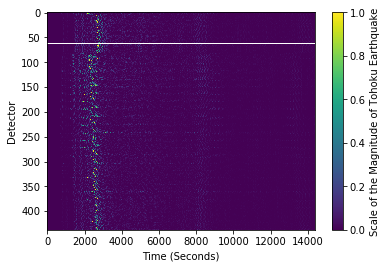

TraitError: Dimension mismatch for trait y of class <class 'bqplot.marks.Lines'>: expected an             array of dimension comprised in interval [1, 2] and got an array of shape ()

ValueError: cannot label index with a null key

In [29]:

## Plot the spectogram 
make_spect()

## display the sliders 
display(slider)
## display the plots 
# plots

## make waveform and detector plot side by side 
plots = widgets.HBox(children=[waveform,detector_loc])
plots

# plots = widgets.HBox(children=[waveform])